<a href="https://colab.research.google.com/github/TiffanyHizon/Linear_Algebra_58051/blob/main/Final%20Exam/LinAlg_58051_Hizon_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import files
upload = files.upload()
import io

Saving regression data.csv to regression data.csv


In [27]:
regressionData = "regression data.csv"
data = pd.read_csv(regressionData)

cost = data.iloc[:,0] #independent
revenue = data.iloc[:,1] #dependent

# **First Method**

In [12]:
linReg = LinearRegression()
#cost = cost.values.reshape(-1, 1)
#revenue = revenue.values.reshape(-1,1)
linReg.fit(cost, revenue)
revPredict = linReg.predict(cost)

In [13]:
print("Slope: ", linReg.coef_) #Printing the slope of the line
print("y-intercept: ", linReg.intercept_) #Printing the y-intercept

Slope:  [1.04617605]
y-intercept:  11.868686868686876


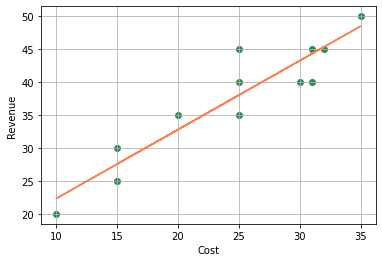

In [14]:
plt.xlabel("Cost")
plt.ylabel("Revenue")

plt.scatter(cost, revenue, color="seagreen")
plt.plot(cost, revPredict, color="coral")

plt.grid()
plt.show()

# **Second Method**

In [15]:
costMean = np.mean(cost)
revMean = np.mean(revenue)

slopeNum = 0
slopeDen = 0

for iteration in range(len(cost)):
  slopeNum += (cost[iteration] - costMean) * (revenue[iteration] - revMean)
  slopeDen += (cost[iteration] - costMean) ** 2
  slope = np.divide(slopeNum, slopeDen)
  intercept = revMean - (slope * costMean)

print("Slope: ", slope)
print("y-intercept: ", intercept)


Slope:  [1.04617605]
y-intercept:  [11.86868687]


[10.         10.51020408 11.02040816 11.53061224 12.04081633 12.55102041
 13.06122449 13.57142857 14.08163265 14.59183673 15.10204082 15.6122449
 16.12244898 16.63265306 17.14285714 17.65306122 18.16326531 18.67346939
 19.18367347 19.69387755 20.20408163 20.71428571 21.2244898  21.73469388
 22.24489796 22.75510204 23.26530612 23.7755102  24.28571429 24.79591837
 25.30612245 25.81632653 26.32653061 26.83673469 27.34693878 27.85714286
 28.36734694 28.87755102 29.3877551  29.89795918 30.40816327 30.91836735
 31.42857143 31.93877551 32.44897959 32.95918367 33.46938776 33.97959184
 34.48979592 35.        ]


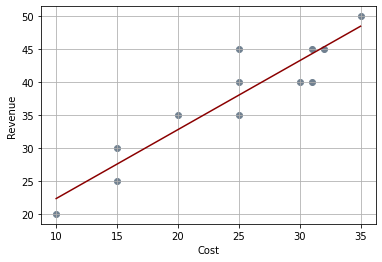

In [35]:
max = np.max(cost)
min = np.min(cost)

pCost = np.linspace(min, max)
pRev = intercept + slope * pCost

plt.xlabel("Cost")
plt.ylabel("Revenue")

plt.scatter(cost, revenue, color="slategray")
plt.plot(pCost, pRev, color="darkred")

plt.grid()
plt.show()

# **Third Method**

In [28]:
a = np.vstack([cost, np.ones(len(cost))]).T
ans = np.dot(np.linalg.inv(np.dot(a.T, a)), np.dot(a.T, revenue))

print("Slope: ", ans[0])
print("y-intercept: ", ans[1])

Slope:  1.0461760461760499
y-intercept:  11.868686868686797


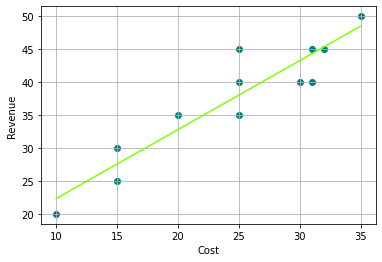

In [36]:
plt.xlabel("Cost")
plt.ylabel("Revenue")

max = np.max(cost)
min = np.min(cost)

nCost = np.linspace(min, max)
nRev = intercept + slope * nCost

plt.scatter(cost, revenue, color="teal")
plt.plot(nCost, nRev, color="chartreuse")
plt.grid()
plt.show()